# Caderno de Sessão de Laboratório - Devoluções
Dos preços às devoluções
Neste laboratório, trabalharemos os conceitos básicos de retornos: calcular retornos e compor uma sequência de retornos.

Vamos começar com um conjunto de preços para uma ação “A”, em uma lista python:

In [1]:
prices_a = [8.70, 8.91, 8.71]

import numpy as np

# Converter para numpy

prices_a = np.array(prices_a)
prices_a

array([8.7 , 8.91, 8.71])

Agora vamos aos calculos de retornos.
O retorno no tempo é dado pela expressão: R = (Pt+1 - Pt)/Pt ou, R = (Pt+1)/Pt- 1 assim:

In [2]:
prices_a[1:]/prices_a[:-1]-1

array([ 0.02413793, -0.02244669])

Agora, vamos adicionar mais alguns dias de preços e apresentar um segundo estoque. Vamos chamar essas duas ações de "AZUL" e "LARANJA". Em vez de usar arrays numpy brutos, usaremos o muito mais poderoso Pandas DataFrame, que envolve a funcionalidade do numpy em uma estrutura de dados muito conveniente e fácil de usar chamada DataFrame. Observe como o DtaFrame possui duas colunas bem indexadas, bem como um índice de linha que, por padrão, vai de 0 a 4.

In [6]:
import pandas as pd

prices = pd.DataFrame({"BLUE": [8.7 , 8.91, 8.71, 8.43, 8.73],
                       "ORANGE": [10.66, 11.08, 10.71, 11.59, 12.11]})
prices

,BLUE,ORANGE
0,8.70,10.66
1,8.91,11.08
2,8.71,10.71
3,8.43,11.59
4,8.73,12.11


*AVISO*

No entanto, como o Pandas DataFrames alinhará o índice de linha (neste caso: 0, 1, 2, 3, 4), exatamente o mesmo fragmento de código não funcionará conforme o esperado. (veja a seção sobre alinhamento de linhas nos vídeos "Crash Course" se isso não estiver claro para você)

In [8]:
prices.iloc[1:]

,BLUE,ORANGE
1,8.91,11.08
2,8.71,10.71
3,8.43,11.59
4,8.73,12.11


In [10]:
prices.iloc[:-1]

,BLUE,ORANGE
0,8.70,10.66
1,8.91,11.08
2,8.71,10.71
3,8.43,11.59


In [11]:
prices.iloc[1:]/prices.iloc[:-1]-1

,BLUE,ORANGE
0,NaN,NaN
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,NaN,NaN



Podemos corrigir isso de várias maneiras. Primeiro, podemos extrair os valores da coluna DataFrame que retorna um array numpy, para que o DataFrame não tente alinhar as linhas.

In [12]:
prices.iloc[1:].values/prices.iloc[:-1]-1

,BLUE,ORANGE
0,0.024138,0.039400
1,-0.022447,-0.033394
2,-0.032147,0.082166
3,0.035587,0.044866


Ou entao:

In [14]:
prices.iloc[1:]/prices.iloc[:-1].values-1

,BLUE,ORANGE
1,0.024138,0.039400
2,-0.022447,-0.033394
3,-0.032147,0.082166
4,0.035587,0.044866


No entanto, existem algumas maneiras de fazer isso sem extrair os valores e provavelmente são um pouco mais limpas e legíveis. A primeira opção é usar o método .shift() no array, que realinha os índices.

In [15]:
prices

,BLUE,ORANGE
0,8.70,10.66
1,8.91,11.08
2,8.71,10.71
3,8.43,11.59
4,8.73,12.11


Como queremos que a linha no índice 0 (8,84 e 10,66) se alinhe com a linha no índice 1 (8,54 e 10,30), podemos dividir a 2ª linha (no índice 1) pela primeira linha (no índice 0) queremos deslocar as linhas no denominador em 1... o que fazemos com .shift(1)

In [16]:
prices.shift(1)

,BLUE,ORANGE
0,NaN,NaN
1,8.70,10.66
2,8.91,11.08
3,8.71,10.71
4,8.43,11.59


Agora obteremos o resultado

In [17]:
returns = prices/prices.shift(1)-1
returns

,BLUE,ORANGE
0,NaN,NaN
1,0.024138,0.039400
2,-0.022447,-0.033394
3,-0.032147,0.082166
4,0.035587,0.044866


Observe como não podemos calcular os retornos do primeiro dia, porque não temos o preço de fechamento do dia anterior. Em geral, perdemos um dado quando passamos dos preços aos retornos.

Finalmente, existe um método integrado no DataFrame que calcula a variação percentual de uma linha para outra. Como o retorno é exatamente isso (a variação percentual no preço), podemos simplesmente usar este método para calcular o retorno.

In [18]:
returns = prices.pct_change()
returns

,BLUE,ORANGE
0,NaN,NaN
1,0.024138,0.039400
2,-0.022447,-0.033394
3,-0.032147,0.082166
4,0.035587,0.044866


# Lendo dados de um arquivo CSV
Como digitar retornos é entediante, vamos ler os dados de um arquivo. O Pandas oferece uma maneira conveniente e simples de ler os retornos em um arquivo CSV.

In [41]:
prices = pd.read_csv("/content/sample_prices.csv")
prices = pd.DataFrame(prices)
prices


,BLUE,ORANGE
0,8.7000,10.6600
1,8.9055,11.0828
2,8.7113,10.7100
3,8.4346,11.5907
4,8.7254,12.1070
5,9.0551,11.7876
6,8.9514,11.2078
7,9.2439,12.5192
8,9.1276,13.3624
9,9.3976,14.4080


In [42]:
returns = prices.pct_change()
returns

,BLUE,ORANGE
0,NaN,NaN
1,0.023621,0.039662
2,-0.021807,-0.033638
3,-0.031763,0.082232
4,0.034477,0.044544
5,0.037786,-0.026381
6,-0.011452,-0.049187
7,0.032676,0.117008
8,-0.012581,0.067353
9,0.029581,0.078249


In [43]:
returns.mean()

BLUE      0.01
ORANGE    0.01
dtype: float64

In [44]:
returns.std()

BLUE      0.023977
ORANGE    0.079601
dtype: float64

<Axes: >

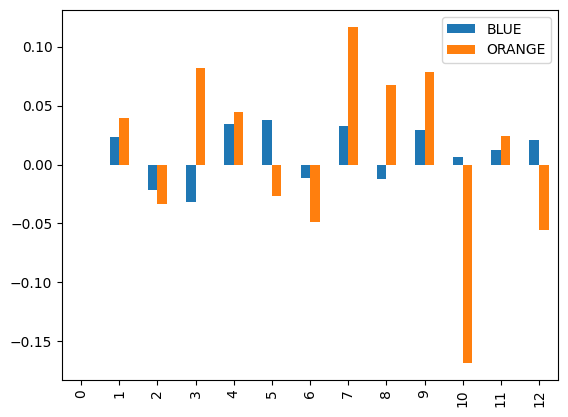

In [45]:
returns.plot.bar()

<Axes: >

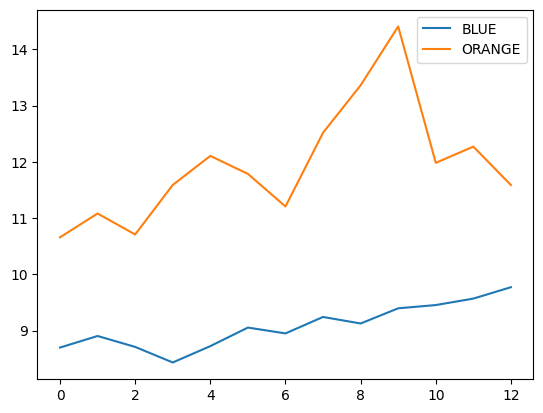

In [47]:
prices.plot()

# Retornos compostos
Agora que temos uma série de retornos mensais de 12, podemos produzir o retorno composto multiplicando os retornos dos períodos individuais, desde que os retornos sejam expressos como taxas de crescimento no que chamo de formato “1+R”.

Para compor os retornos, tudo o que precisamos fazer é adicionar 1 a cada retorno e depois multiplicá-los. O resultado está no formato "1+R", então precisamos subtrair 1.

Vamos calcular o retorno composto de nossas duas séries.

In [48]:
returns + 1

,BLUE,ORANGE
0,NaN,NaN
1,1.023621,1.039662
2,0.978193,0.966362
3,0.968237,1.082232
4,1.034477,1.044544
5,1.037786,0.973619
6,0.988548,0.950813
7,1.032676,1.117008
8,0.987419,1.067353
9,1.029581,1.078249


In [49]:
np.prod(returns+1)

BLUE      1.123310
ORANGE    1.087167
dtype: float64

In [50]:
(returns+1).prod()

BLUE      1.123310
ORANGE    1.087167
dtype: float64

In [51]:
(returns+1).prod()-1

BLUE      0.123310
ORANGE    0.087167
dtype: float64

In [52]:
(((returns+1).prod()-1)*100).round(2)

BLUE      12.33
ORANGE     8.72
dtype: float64

# Anualizando retornos
Para anualizar o retorno de um período, você compõe o retorno quantas vezes houver períodos em um ano. Por exemplo, para anualizar um retorno mensal você calcula esse retorno 12 vezes. A fórmula para anualizar um retorno mensal 𝑅𝑚
  é:

(1+𝑅𝑚)**12−1

Para anualizar um retorno trimestral 𝑅𝑞
  você obteria:

(1+𝑅𝑞)**4−1

E finalmente, para anualizar um retorno diário 𝑅𝑑
  você obteria:

(1+𝑅𝑑)**252−1

Por exemplo, para anualizar 1% ao mês e 4% trimestralmente e um retorno diário de 0,01% você faria:

In [53]:
rm = 0.01
rq = 0.04
rd = 0.0001
#

(1+rm)**12-1
print(f"Retorno mensal anualizado: {(1+rm)**12-1}")
(1+rq)**4-1
print(f"Retorno trimestral anualizado: {(1+rq)**4-1}")
(1+rd)**252-1
print(f"Retorno diário anualizado: {(1+rd)**252-1}")

Retorno mensal anualizado: 0.12682503013196977
Retorno trimestral anualizado: 0.1698585600000002
Retorno diário anualizado: 0.025518911987694626
